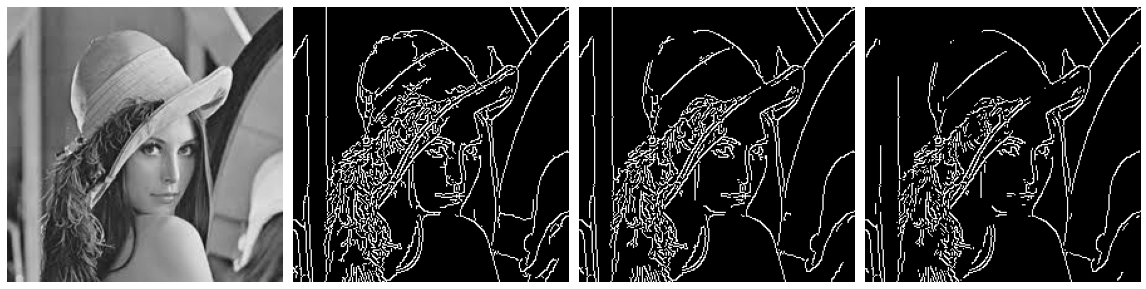

In [1]:
from functions import *
import cv2

path = get_path('lena.jpg')
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

edge_1 = cv2.Canny(img, 50, 200)
edge_2 = cv2.Canny(img, 100, 200)
edge_3 = cv2.Canny(img, 170, 200)

images = [img, edge_1, edge_2, edge_3]
display(images, is_gray=True)


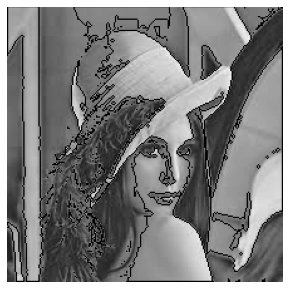

In [2]:
copied = img.copy()
ret, thr = cv2.threshold(copied, 127, 255, 0)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copied, contours, -1, (0, 0, 255), 1)

images = [copied]
display(images, is_gray=True)


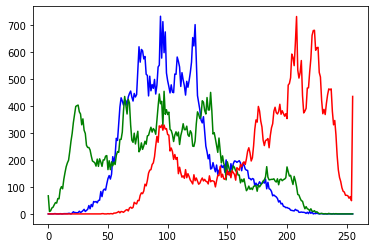

In [10]:
img = cv2.imread(path)
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)


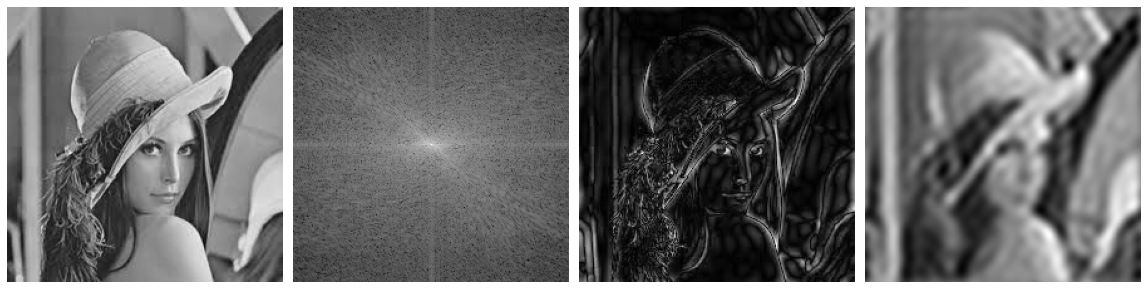

In [26]:
import numpy as np

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
m_spectrum = 20*np.log(np.abs(fshift))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift_copy = fshift.copy()
hpf_size = 10
fshift_copy[crow-hpf_size:crow+hpf_size, ccol-hpf_size:ccol+hpf_size] = 0
f_ishift = np.fft.ifftshift(fshift_copy)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fshift_copy_2 = fshift.copy()
lpf_size = 15
fshift_copy_2[:crow-lpf_size, :] = 0
fshift_copy_2[crow+lpf_size:, :] = 0
fshift_copy_2[:, :ccol-lpf_size] = 0
fshift_copy_2[:, ccol+lpf_size:] = 0
f_ishift_2 = np.fft.ifftshift(fshift_copy_2)
img_back_2 = np.fft.ifft2(f_ishift_2)
img_back_2 = np.abs(img_back_2)

images = [img, m_spectrum, img_back, img_back_2]
display(images, is_gray=True)


###### 푸리에 변환 후에 십자 모양이나 원점을 중심으로 특정한 각도로 나타나는 선분은 어떤 의미가 있을까?